## Section 1: Dataset

This Dataset is from kaggle : https://www.kaggle.com/datasets/mlippo/average-global-iq-per-country-with-other-stats
This project will focus the relationship between IQ, Continent, and HDI.
This dataset is pretty interesting becuase it has a lot of information about the country, and it is a good dataset to practice data cleaning.
Also This dataset makes me curious about whether there is a continent where people are smarter than other continents.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
df = pd.read_csv('avgIQpercountry.csv')
df = df.drop(['Nobel Prices'],axis = 1)
df = df.dropna(axis=0)
df

,Rank,Country,Average IQ,Continent,Literacy Rate,HDI (2021),Mean years of schooling - 2021,GNI - 2021,Population - 2023
0,1,Japan,106.48,Asia,0.99,0.925,13.4,42274.0,123294513
2,3,Singapore,105.89,Asia,0.97,0.939,11.9,90919.0,6014723
3,4,Hong Kong,105.37,Asia,0.94,0.952,12.2,62607.0,7491609
4,5,China,104.10,Asia,0.96,0.768,7.6,17504.0,1425671352
5,6,South Korea,102.35,Asia,0.98,0.925,12.5,44501.0,51784059
...,...,...,...,...,...,...,...,...,...
188,189,Gambia,52.68,Africa,0.58,0.500,4.6,2172.0,2773168
189,190,Guatemala,47.72,Central America,0.79,0.627,5.7,8723.0,18092026
190,191,Liberia,45.07,Africa,0.48,0.481,5.1,1289.0,5418377
191,192,Sierra Leone,45.07,Africa,0.48,0.477,4.6,1622.0,8791092


#### Find the Country with the highest Average IQ.

Since we use `reset_index()`, we can see Japan has the highest average IQ.  

## Section 2: Exploratory Data Analysis

Let's try to find the Average IQ and average Literacy Rate for Each Continent. I am wondering if there is a continent where people are smarter than other continents.

In [3]:
df = df.dropna()
average_iq_literacy_by_continent = df.groupby('Continent').agg(
    Average_IQ=('Average IQ', 'mean'),
    Average_Literacy_Rate=('Literacy Rate', 'mean')
).reset_index()

# Display the DataFrame with average IQ and average Literacy Rate by continent
average_iq_literacy_by_continent


,Continent,Average_IQ,Average_Literacy_Rate
0,Africa,68.793469,0.676327
1,Asia,84.886591,0.894091
2,Central America,73.810000,0.907895
3,Europe,94.904878,0.988293
4,Europe/Asia,89.196667,0.986667
5,North America,94.893333,0.976667
6,Oceania,88.257500,0.888750
7,South America,83.783333,0.950000


Now let's find the sameple size for each contnent. I am wondering if the sample size is big enough to make a conclusion.

In [4]:
sample_size_by_continent = df.groupby('Continent').size().reset_index(name='Sample Size')
sample_size_by_continent

,Continent,Sample Size
0,Africa,49
1,Asia,44
2,Central America,19
3,Europe,41
4,Europe/Asia,3
5,North America,3
6,Oceania,8
7,South America,12


### People Cotinent of Eqrope are more smarter than other continents, for example Africa?

As we can see here, we got the result that the average IQ for each continent. The result is pretty interesting. The average IQ for each continent seems to be a little bit far. For example, the average IQ for Equope is 94.904878 which has the highest average IQ and for Africa, the Average IQ is 68.793469. The difference is 26.161409. This is a pretty big difference. However, we can not make a conclusion yet because the sample size for each continent is not big enough. For example, the sample size for Africa is 49. This is not big enough to make a conclusion. Therefore, we need to find the sample size for each continent.

## Section 3: Exploratory Data Visualization

### Now, after we finish analyzing the average IQ for each continent, let's try to make these data more visualized.

#### First, Let's try to make a bar chart for the average IQ for each continent.

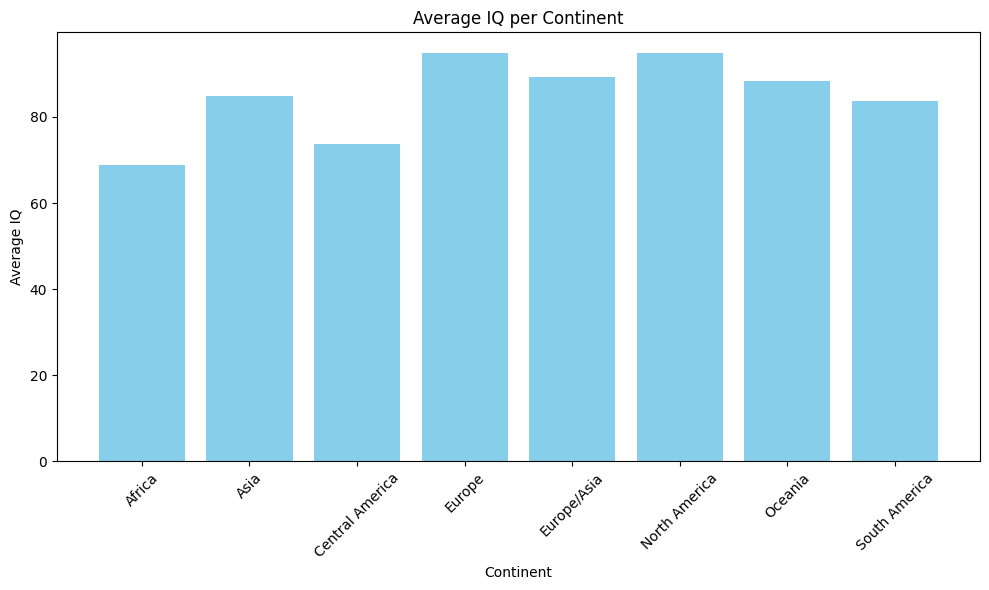

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(average_iq_literacy_by_continent['Continent'], average_iq_literacy_by_continent['Average_IQ'], color='skyblue')
plt.title('Average IQ per Continent')
plt.xlabel('Continent')
plt.ylabel('Average IQ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Next let's try to make a scatter plot for the sample size for each continent.

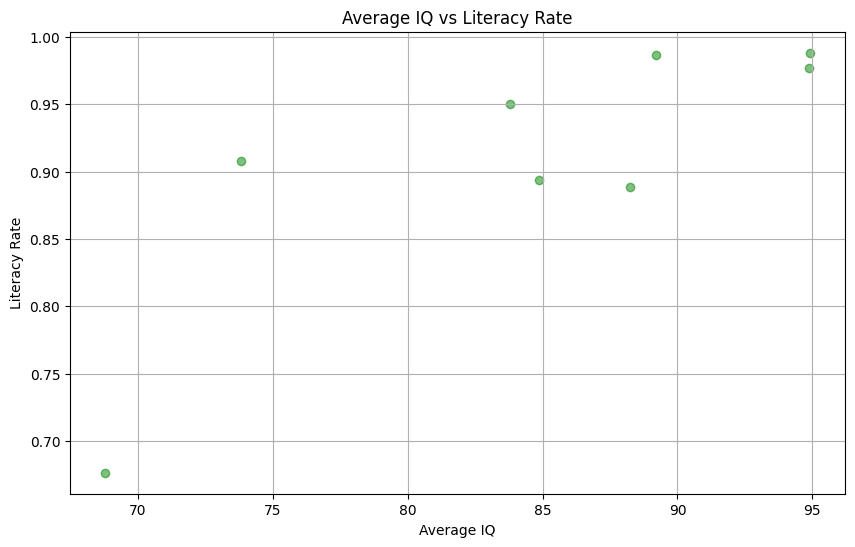

In [8]:

plt.figure(figsize=(10, 6))
plt.scatter(average_iq_literacy_by_continent['Average_IQ'], average_iq_literacy_by_continent['Average_Literacy_Rate'], color='green', alpha=0.5)
plt.title('Average IQ vs Literacy Rate')
plt.xlabel('Average IQ')
plt.ylabel('Literacy Rate')
plt.grid(True)
plt.show()

#### Finally, we will make a conclusion.

For the second diagram, we can see, high Literacy Rate simply means high IQ. For Europe, they have highest average literacy rate and IQ, and Africa has the lowest average literacy rate and IQ. According to our basic knowledge, compared to Europe and the United States, Africa is far less developed and does not have such a high level of education and education penetration, so this result is not surprising. But we still can't say that Europeans are smarter than Africans.

## Sections 4: Data Science

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns only
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
correlation_matrix

,Rank,Average IQ,Literacy Rate,HDI (2021),Mean years of schooling - 2021,GNI - 2021
Rank,1.000000,-0.974454,-0.623534,-0.777376,-0.727461,-0.661285
Average IQ,-0.974454,1.000000,0.633435,0.755459,0.705443,0.634854
Literacy Rate,-0.623534,0.633435,1.000000,0.815929,0.831993,0.501705
HDI (2021),-0.777376,0.755459,0.815929,1.000000,0.914750,0.787799
Mean years of schooling - 2021,-0.727461,0.705443,0.831993,0.914750,1.000000,0.661834
GNI - 2021,-0.661285,0.634854,0.501705,0.787799,0.661834,1.000000


<Axes: xlabel='HDI (2021)', ylabel='Mean years of schooling - 2021'>

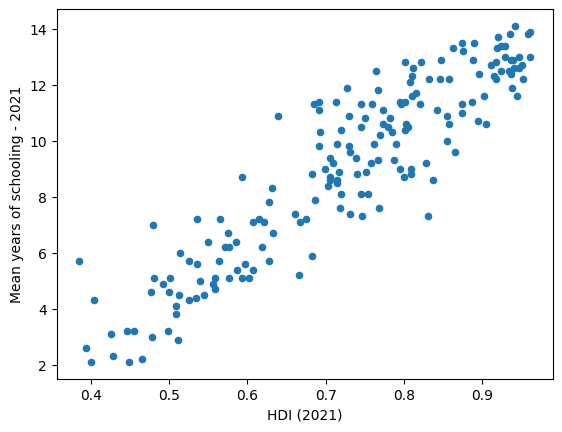

In [15]:
df.plot.scatter(x='HDI (2021)', y='Mean years of schooling - 2021')


From Scatter Plot  above, you may have noticed that **HDI(2021)** and **Mean years of scholing - 2021** have significant **linear correlation**. 

We learned that **linear regression** allows us to predict values based on a "line of best fit". The equation for simple linear regression is:

> $$y = (\text{slope}) * X + \text{intercept}$$

For this portion of the lab, we will be using **linear regression** to explore the relationship between **HDI(2021)** (in square feet) and **pMean years of scholing - 2021**  in our `df`. 

We can apply formulas we have learned in lecture alongside Python to create a **linear regression model** to predict *Mean years of schooling - 2021** ($y$) given **HDI (2021)** ($X$).

## Puzzle 2.1: Calculating Slope of the Regression Line
In lecture, you learned how to **calculate the slope** of the regression line given your $X$ and $y$ columns of data. The formula is as follows:

> $$\text{slope} = r * \frac{SD(y)}{SD(x)}$$

Where $r$ is the correlation coefficient between $X$ and $y$, and $SD$ stands for standard deviation. 

With this, find the slope of the regression line where the dependent variable ($y$) is `HDI (2021)` and the independent variable ($X$) is `Mean years of schooling - 2021`, storing your answer in the **numeric variable** `slope` below:


In [25]:
numerical_cols = ['Average IQ', 'Literacy Rate', 'HDI (2021)', 'Mean years of schooling - 2021', 'Population - 2023']
numeric_df = df[numerical_cols]
correlation_matrix = numeric_df.corr()
r = correlation_matrix.loc['HDI (2021)', 'Mean years of schooling - 2021']
std_schooling = numeric_df['Mean years of schooling - 2021'].std()
std_HDI = numeric_df['HDI (2021)'].std()
slope = r * (std_schooling / std_HDI)
slope

19.08933796787343

**Calculating Intercept of the Regression Line**
You also learned how to calculate the **y-intercept** of the regression line in lecture. The formula is as follows:

> $$\text{intercept} = \text{avg}(y) - \text{slope} * \text{avg}(X)$$

Find the **y-intercept** of the regression line between `Mean years of schooling - 2021` ($y$) and `HDI (2021)` ($X$), storing your result in the numeric variable `intercept` below: 

In [27]:
intercept = numeric_df['Mean years of schooling - 2021'].mean() - slope * numeric_df['HDI (2021)'].mean()
intercept

-4.794535244244793

## Now, it's time to visualize our regression line!
Now that we have calculated the **slope** and **y-intercept** of your regression line, let's **visualize** it. Run the following code that uses the `seaborn` library to **plot a regression line** on top of a scatter plot of between `HDI (2021)` and `Mean years of schooling - 2021` - your regression line will be **green**. 

RESE is 8.84338819582873


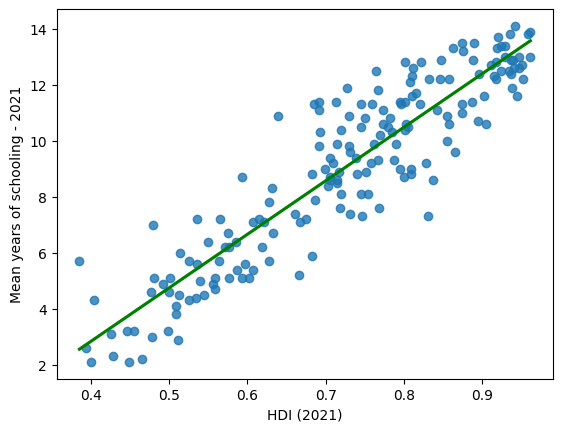

In [30]:
import seaborn as sns
from sklearn.metrics import mean_squared_error
sns.regplot(data=df, x="HDI (2021)", y="Mean years of schooling - 2021", ci=None, line_kws={'color':'green'})
RMSE = mean_squared_error(numeric_df["Mean years of schooling - 2021"], numeric_df["HDI (2021)"])**0.5
print('RESE is', RMSE)


## Summary for Section 4:

The diagram is a scatter plot that visualizes the relationship between the Human Development Index (HDI) of 2021 and the mean years of schooling in 2021. The points on the plot represent different data points, presumably for different countries or regions.

The Human Development Index is plotted on the x-axis, ranging approximately from 0.4 to 1.0. The mean years of schooling are plotted on the y-axis, with values ranging approximately from 2 to 14 years.

A line of best fit has been added to the scatter plot, indicating a positive correlation between HDI and the mean years of schooling — as the HDI increases, the mean years of schooling also tends to increase. This suggests that higher human development is associated with longer periods of education.

The plot also shows the Residual Standard Error (RSE) value, which is 8.4333819582873. This value gives an indication of the spread of the data points around the fitted line; in this context, it measures the standard deviation of the residuals (the vertical distances of the points from the line).

In summary, the scatter plot suggests a strong positive correlation between a country's human development level and its educational attainment, with some variability as indicated by the RSE.

## Section 5: Summary

##### In this lab, we learned how to use **linear regression** to predict values based on a "line of best fit". We also learned how to calculate the **slope** and **y-intercept** of a regression line, and how to visualize a regression line on top of a scatter plot.

##### A big dataset from Kaggle was used in this independent data science project to investigate the fascinating relationships between Average IQ, Literacy Rate, Human Development Index (HDI), and other socioeconomic indicators across different continents. The project's goal was to cleanse the data, do exploratory data analysis, and illustrate the results in order to uncover relevant patterns and linkages.

##### The first data cleaning procedure included deleting extraneous columns and dealing with missing values, laying the groundwork for a solid analysis. The exploratory phase found that Japan had the highest Average IQ, while data aggregation by continent revealed significant differences in Average IQ and Literacy Rates across different locations. While the experiment considered the intelligence quotient of whole continents, it advised against drawing broad generalizations due to the continents' different sample sizes.

##### Bar charts and scatter plots were used in subsequent visualization efforts to better comprehend the distribution and connection between Average IQ and Literacy Rates. The visualizations revealed a significant positive association between HDI and mean years of schooling, implying that nations with higher human development indices had populations with more years of education.

##### A linear regression model was created using data science approaches to estimate mean years of schooling based on HDI, finding a substantial linear association between both variables. The regression study, which included the determination of the slope and intercept, demonstrated HDI's predictive potential on educational outcomes.

##### In conclusion, our study demonstrated the power of data science to reveal complicated socioeconomic patterns and spark significant conversations about global development. It exemplified the core of data-driven inquiry in answering questions about human development and educational achievement by demonstrating a careful approach to data analysis, from rigorous preparation to insightful interpretation.